In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadzidanhusaini","key":"7ba6b154b8dc0f9679f586a944ae13f5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d benroshan/factors-affecting-campus-placement

Dataset URL: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement
License(s): CC0-1.0
  0% 0.00/4.51k [00:00<?, ?B/s]
100% 4.51k/4.51k [00:00<00:00, 9.59MB/s]


In [ ]:
!mkdir factors-affecting-campus-placement
!unzip factors-affecting-campus-placement.zip -d factors-affecting-campus-placement
!ls factors-affecting-campus-placement

Archive:  factors-affecting-campus-placement.zip
  inflating: factors-affecting-campus-placement/Placement_Data_Full_Class.csv  
Placement_Data_Full_Class.csv


#import library

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

In [ ]:
df = pd.read_csv("/content/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")

#data understanding

In [ ]:
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [ ]:
df.shape

(215, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(4,3))
sns.countplot(x='gender', data=df, ax=axs)
axs.set_xlabel('Gender')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Gender dalam Dataset')
plt.show()

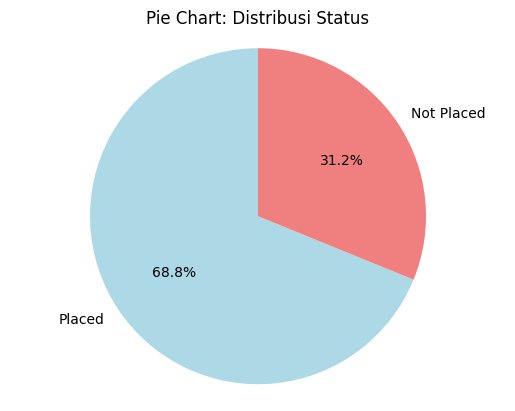

In [ ]:
# Membuat pie chart
status_counts = df['status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax.axis('equal')

# Menambahkan judul
plt.title('Pie Chart: Distribusi Status')

# Menampilkan pie chart
plt.show()

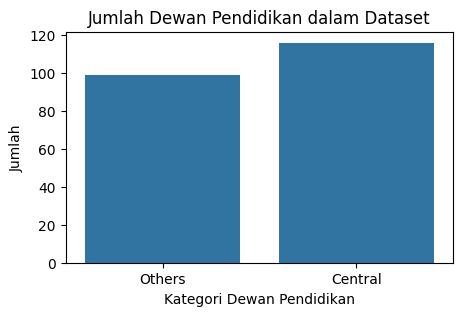

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(5,3))
sns.countplot(x='ssc_b', data=df, ax=axs)
axs.set_xlabel('Kategori Dewan Pendidikan')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Dewan Pendidikan dalam Dataset')
plt.show()

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(5,3))
sns.countplot(x='hsc_s', data=df, ax=axs)
axs.set_xlabel('Peminatan dalam Pendidikan Menengah Tinggi')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Peminatan dalam Pendidikan Menengah Tinggi dalam Dataset')
plt.show()

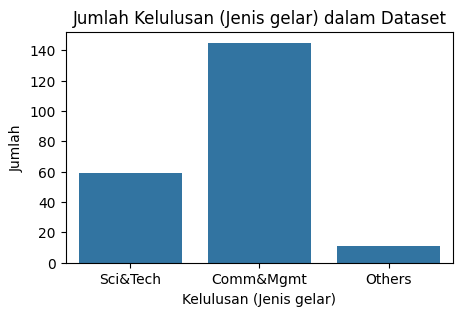

In [ ]:
fig, axs = plt.subplots(ncols=1, figsize=(5,3))
sns.countplot(x='degree_t', data=df, ax=axs)
axs.set_xlabel('Kelulusan (Jenis gelar)')
axs.set_ylabel('Jumlah')
axs.set_title('Jumlah Kelulusan (Jenis gelar) dalam Dataset')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['salary'], bins=50, hist=False)
plt.title("Salary Distribution")
plt.show()

<ipython-input-66-305ca89a1be9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'], bins=50, hist=False)


In [1]:
df.shape

NameError: name 'df' is not defined

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print('categorical variables: ',object_cols)

categorical variables:  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [ ]:
df1 = df.copy()

encoder = OrdinalEncoder()

df1[object_cols] = encoder.fit_transform(df1[object_cols])

df1.head()

sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1     1.0  67.00    1.0  91.00    1.0    1.0     58.00       2.0   
1      2     1.0  79.33    0.0  78.33    1.0    2.0     77.48       2.0   
2      3     1.0  65.00    0.0  68.00    0.0    0.0     64.00       0.0   
3      4     1.0  56.00    0.0  52.00    0.0    2.0     52.00       2.0   
4      5     1.0  85.80    0.0  73.60    0.0    1.0     73.30       0.0   

   workex  etest_p  specialisation  mba_p  status    salary  
0     0.0     55.0             1.0  58.80     1.0  270000.0  
1     1.0     86.5             0.0  66.28     1.0  200000.0  
2     0.0     75.0             0.0  57.80     1.0  250000.0  
3     0.0     66.0             1.0  59.43     0.0       NaN  
4     0.0     96.8             0.0  55.50     1.0  425000.0

#download dataset

In [ ]:
df1_salary_mean = df1['salary'].mean()
df1['salary'] = df1['salary'].fillna(df1_salary_mean)

In [ ]:
scaled_cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

scaler = StandardScaler()

df1[scaled_cols] = scaler.fit_transform(df1[scaled_cols])


df1.head()

sl_no  gender     ssc_p  ssc_b     hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1     1.0 -0.028087    1.0  2.268812    1.0    1.0 -1.140102       2.0   
1      2     1.0  1.113369    0.0  1.103448    1.0    2.0  1.513267       2.0   
2      3     1.0 -0.213238    0.0  0.153313    0.0    0.0 -0.322843       0.0   
3      4     1.0 -1.046417    0.0 -1.318339    0.0    2.0 -1.957362       2.0   
4      5     1.0  1.712332    0.0  0.668391    0.0    1.0  0.943909       0.0   

   workex   etest_p  specialisation     mba_p  status        salary  
0     0.0 -1.291091             1.0 -0.597647     1.0 -2.414078e-01  
1     1.0  1.087157             0.0  0.687620     1.0 -1.147234e+00  
2     0.0  0.218908             0.0 -0.769474     1.0 -5.002152e-01  
3     0.0 -0.460592             1.0 -0.489396     0.0 -7.532285e-16  
4     0.0  1.864806             0.0 -1.164676     1.0  1.764349e+00

#

#modeling

In [ ]:
df1.head()

sl_no  gender     ssc_p  ssc_b     hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1     1.0 -0.028087    1.0  2.268812    1.0    1.0 -1.140102       2.0   
1      2     1.0  1.113369    0.0  1.103448    1.0    2.0  1.513267       2.0   
2      3     1.0 -0.213238    0.0  0.153313    0.0    0.0 -0.322843       0.0   
3      4     1.0 -1.046417    0.0 -1.318339    0.0    2.0 -1.957362       2.0   
4      5     1.0  1.712332    0.0  0.668391    0.0    1.0  0.943909       0.0   

   workex   etest_p  specialisation     mba_p  status        salary  
0     0.0 -1.291091             1.0 -0.597647     1.0 -2.414078e-01  
1     1.0  1.087157             0.0  0.687620     1.0 -1.147234e+00  
2     0.0  0.218908             0.0 -0.769474     1.0 -5.002152e-01  
3     0.0 -0.460592             1.0 -0.489396     0.0 -7.532285e-16  
4     0.0  1.864806             0.0 -1.164676     1.0  1.764349e+00

In [ ]:
df1  = df1.drop('sl_no', axis = 1)

In [ ]:
df1.head()

gender     ssc_p  ssc_b     hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0     1.0 -0.028087    1.0  2.268812    1.0    1.0 -1.140102       2.0   
1     1.0  1.113369    0.0  1.103448    1.0    2.0  1.513267       2.0   
2     1.0 -0.213238    0.0  0.153313    0.0    0.0 -0.322843       0.0   
3     1.0 -1.046417    0.0 -1.318339    0.0    2.0 -1.957362       2.0   
4     1.0  1.712332    0.0  0.668391    0.0    1.0  0.943909       0.0   

   workex   etest_p  specialisation     mba_p  status        salary  
0     0.0 -1.291091             1.0 -0.597647     1.0 -2.414078e-01  
1     1.0  1.087157             0.0  0.687620     1.0 -1.147234e+00  
2     0.0  0.218908             0.0 -0.769474     1.0 -5.002152e-01  
3     0.0 -0.460592             1.0 -0.489396     0.0 -7.532285e-16  
4     0.0  1.864806             0.0 -1.164676     1.0  1.764349e+00

In [ ]:
df1  = df1.drop('sl_no', axis = 1)
features = df1.drop('status',axis = 1)
label = df1['status']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.2 , random_state = 1)

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)

Shape of x_train:  (172, 13)
Shape of y_train:  (172,)
Shape of x_train:  (172, 13)
Shape of x_test:  (43, 13)


In [ ]:
model = tf.keras.Sequential([
    keras.layers.Dense(64,input_shape = (13,) , activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 0.6849 - accuracy: 0.6279
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6977
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.7558
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5322 - accuracy: 0.8081
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5004 - accuracy: 0.8314
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.8256
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.8430
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8430
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8488
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8547
Epoch 11/100
6/6 [===========

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.1838 - accuracy: 0.9070


[0.1837625503540039, 0.9069767594337463]

In [ ]:
yp = model.predict(x_test)
yp[:5]

2/2 [==============================] - 0s 6ms/step


array([[0.89539784],
       [0.9960891 ],
       [0.01916461],
       [0.99885887],
       [0.03744984]], dtype=float32)

In [ ]:
y_pred = []
for element in yp :
    if element > 0.5 :
        y_pred.append(1)
    else :
        y_pred.append(0)

In [ ]:
y_pred[:5]

[1, 1, 0, 1, 0]

In [ ]:
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        15
         1.0       0.93      0.93      0.93        28

    accuracy                           0.91        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



In [ ]:
score = accuracy_score(y_test,y_pred)
print(' Accuracy Score: {:0.2f}'.format(score))

 Accuracy Score: 0.91


In [ ]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (5,4))
sns.heatmap(cm , annot = True)

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import random

#input_data = (random.randint(0,100), random.randint(0,100), random.randint(0,100), random.randint(0,35), random.randint(0,100), random.randint(0,8), random.randint(0,300),random.randint(0,100),random.randint(0,100),random.randint(0,100),random.randint(0,100),random.randint(0,100),random.randint(0,100))
input_data1 = (1.0,	67.00,	1.0,	91.00,	1.0,	1.0,	58.00,	2.0,	0.0,	55.0,	1.0, 58.80, 270000.0)

input_data_as_numpy_array = np.array(input_data1)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
input_data_reshape_scaled = encoder.transform(input_data_reshape)

crop_names = ['not placed', 'placed']

predicted_crop_index = np.argmax(prediction)
print(input_data1)
print(crop_names[predicted_crop_index])
print(predicted_crop_index)

1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


ValueError: X has 13 features, but OrdinalEncoder is expecting 8 features as input.

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model from HDF5 format
model = tf.keras.models.load_model('my_model.h5')

# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)